### Assignment

Please try all the classification algorithms that you have learned so far on this. It's a income prediction. The above data is from US census. All the columns should be self explanatory except 'fnlwgt' this is a calculation they are computing and arriving at a number. The calculation logic is hidden from us. Treat that as numerical column. Target column is income. It's a binary classification problem.

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
df = pd.read_csv('adult.csv')

In [35]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,#NAME?,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
age               5000 non-null object
workclass         5000 non-null object
fnlwgt            5000 non-null object
education         5000 non-null object
education_num     5000 non-null object
marital_status    5000 non-null object
occupation        5000 non-null object
relationship      5000 non-null object
race              5000 non-null object
sex               5000 non-null object
capital_gain      5000 non-null int64
capital_loss      5000 non-null int64
hours_per_week    5000 non-null int64
native_country    5000 non-null object
income            5000 non-null object
dtypes: int64(3), object(12)
memory usage: 586.0+ KB


In [37]:
df.dtypes

age               object
workclass         object
fnlwgt            object
education         object
education_num     object
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [38]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [39]:
df.sex.value_counts()

Male      3332
Female    1621
#NAME?      47
Name: sex, dtype: int64

In [40]:
df.workclass.value_counts()

Private             3435
Self-emp-not-inc     383
?                    331
Local-gov            329
State-gov            193
Self-emp-inc         182
Federal-gov          146
Without-pay            1
Name: workclass, dtype: int64

In [41]:
df.marital_status.value_counts()

Married-civ-spouse       2270
Never-married            1659
Divorced                  682
Widowed                   160
Separated                 158
Married-spouse-absent      66
Married-AF-spouse           5
Name: marital_status, dtype: int64

In [42]:
df.occupation.value_counts()

Prof-specialty       625
Craft-repair         619
Exec-managerial      618
Sales                588
Adm-clerical         576
Other-service        495
?                    331
Machine-op-inspct    312
Transport-moving     247
Handlers-cleaners    196
Farming-fishing      143
Tech-support         140
Protective-serv       90
Priv-house-serv       18
Armed-Forces           2
Name: occupation, dtype: int64

In [43]:
df.race.value_counts()

White                 4021
Black                  493
#NAME?                 264
Asian-Pac-Islander     145
Amer-Indian-Eskimo      48
Other                   29
Name: race, dtype: int64

In [23]:
df.native_country.value_counts()

United-States                 4465
Mexico                         104
?                               97
Canada                          28
Germany                         22
Philippines                     22
El-Salvador                     16
Puerto-Rico                     16
England                         16
Jamaica                         15
China                           15
Cuba                            14
Dominican-Republic              13
India                           12
Italy                           12
Iran                            11
Guatemala                       10
Vietnam                         10
Taiwan                          10
Poland                           9
Japan                            9
South                            9
Portugal                         7
Haiti                            6
Greece                           6
Columbia                         5
Nicaragua                        5
Trinadad&Tobago                  4
Cambodia            

In [44]:
columns = df.columns

In [45]:
df = pd.DataFrame(np.where((df == '#NAME?'),np.nan,df))

In [46]:
df = pd.DataFrame(np.where((df == '?'),np.nan,df))

In [47]:
df.columns = columns

In [48]:
df.isna().sum()

age                48
workclass         331
fnlwgt            107
education          57
education_num      57
marital_status      0
occupation        331
relationship        0
race              264
sex                47
capital_gain        0
capital_loss        0
hours_per_week      0
native_country     97
income              0
dtype: int64

In [50]:
df["age"]= df[["age"]].astype(np.float)


In [51]:
df["fnlwgt"]= df[["fnlwgt"]].astype(np.float)

In [52]:
df["education_num"]= df[["education_num"]].astype(np.float)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
age               4952 non-null float64
workclass         4669 non-null object
fnlwgt            4893 non-null float64
education         4943 non-null object
education_num     4943 non-null float64
marital_status    5000 non-null object
occupation        4669 non-null object
relationship      5000 non-null object
race              4736 non-null object
sex               4953 non-null object
capital_gain      5000 non-null object
capital_loss      5000 non-null object
hours_per_week    5000 non-null object
native_country    4903 non-null object
income            5000 non-null object
dtypes: float64(3), object(12)
memory usage: 586.0+ KB


In [54]:
df["workclass"].replace({np.nan:"Others"},inplace=True)

In [55]:
df["occupation"].replace({np.nan:"Others"},inplace=True)

In [56]:
df["race"].fillna(df["race"].mode()[0],inplace=True)

In [57]:
df["native_country"].fillna(df["native_country"].mode()[0],inplace=True)

In [58]:
df.isna().sum()

age                48
workclass           0
fnlwgt            107
education          57
education_num      57
marital_status      0
occupation          0
relationship        0
race                0
sex                47
capital_gain        0
capital_loss        0
hours_per_week      0
native_country      0
income              0
dtype: int64

In [59]:
df.drop(["education"],axis=1,inplace=True)

In [61]:
df.isna().sum()

age                48
workclass           0
fnlwgt            107
education_num      57
marital_status      0
occupation          0
relationship        0
race                0
sex                47
capital_gain        0
capital_loss        0
hours_per_week      0
native_country      0
income              0
dtype: int64

In [62]:
df = df.dropna(axis = 0,subset = ['sex','age'])

In [63]:
df.isna().sum()

age                 0
workclass           0
fnlwgt            106
education_num      57
marital_status      0
occupation          0
relationship        0
race                0
sex                 0
capital_gain        0
capital_loss        0
hours_per_week      0
native_country      0
income              0
dtype: int64

In [64]:
df['education_num'] = df['education_num'].fillna(0)


C:\Users\Akshara\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [66]:
df['fnlwgt'] = df['fnlwgt'].fillna(df['fnlwgt'].mean())


C:\Users\Akshara\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [67]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [73]:
df["capital_gain"]= df[["capital_gain"]].astype('int64')


In [74]:
df["capital_loss"]= df[["capital_loss"]].astype('int64')

In [75]:
df["hours_per_week"]= df[["hours_per_week"]].astype('int64')

In [76]:
import pandas_profiling

In [77]:
pandas_profiling.ProfileReport(df)

Number of variables,15
Number of observations,4905
Total Missing (%),0.0%
Total size in memory,574.9 KiB
Average record size in memory,120.0 B
Numeric,7
Categorical,8
Boolean,0
Date,0
Text (Unique),0
Rejected,0


### KNN Model

In [78]:
df.dtypes

age               float64
workclass          object
fnlwgt            float64
education_num     float64
marital_status     object
occupation         object
relationship       object
race               object
sex                object
capital_gain        int64
capital_loss        int64
hours_per_week      int64
native_country     object
income             object
dtype: object

In [79]:
Encodeddf = pd.get_dummies(df[["workclass","marital_status","occupation","relationship","race","sex","native_country"]])

In [80]:
df = pd.concat([Encodeddf,df[["age","fnlwgt","education_num","capital_gain","capital_loss","hours_per_week","income"]]],axis=1)

In [81]:
from sklearn.preprocessing import StandardScaler

In [82]:
scaler = StandardScaler()

In [83]:
scaled_features = scaler.fit_transform(df.drop("income",axis=1))

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
X_train,X_test, y_train,y_test = train_test_split(scaled_features,df["income"],test_size=0.2,random_state=101)

In [86]:
from sklearn.neighbors import KNeighborsClassifier

In [87]:
knn = KNeighborsClassifier(n_neighbors=30)

In [88]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=30, p=2,
           weights='uniform')

In [89]:
pred = knn.predict(X_test)

In [90]:
from sklearn.metrics import classification_report,confusion_matrix

In [91]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

      <=50K       0.85      0.94      0.89       740
       >50K       0.72      0.50      0.59       241

avg / total       0.82      0.83      0.82       981



In [92]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0,0.5,'Error Rate')

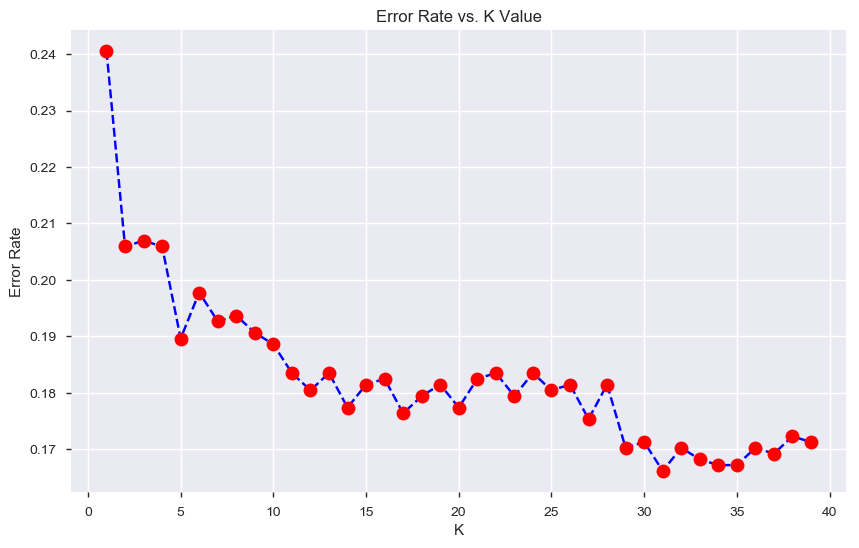

In [93]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')